In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-dataset/depression_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/depression-dataset/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
df.shape

(413768, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [7]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [8]:
df.duplicated().sum()

0

# **Data Visualization**

**Numberic data correlation**

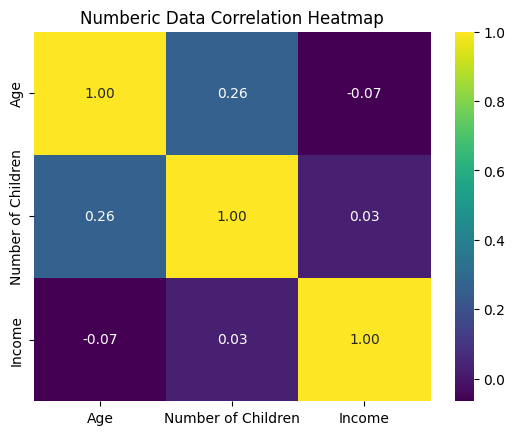

In [9]:
numeric_data = df.select_dtypes(['int64','float64'])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Numberic Data Correlation Heatmap")
plt.show()

**Age Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


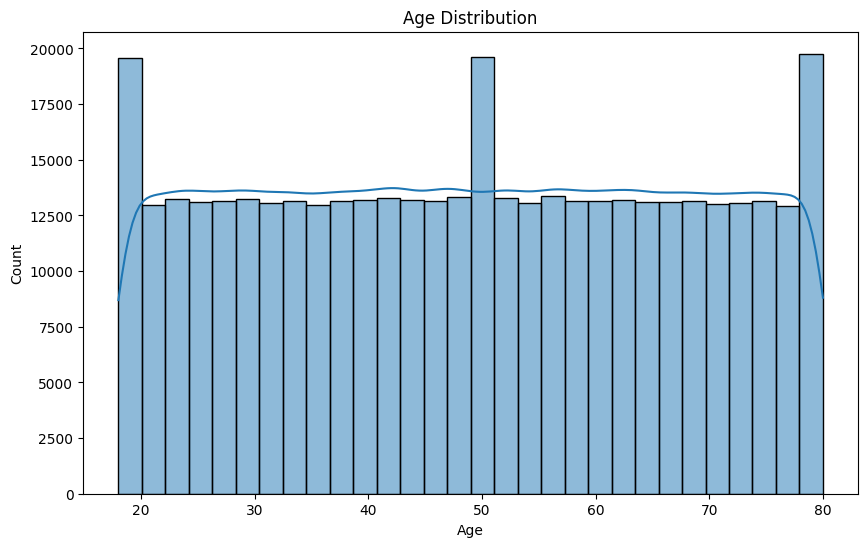

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age',bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

**Marital Status effects on Depression**

Text(0.5, 1.0, 'Marital Status effects on Depression')

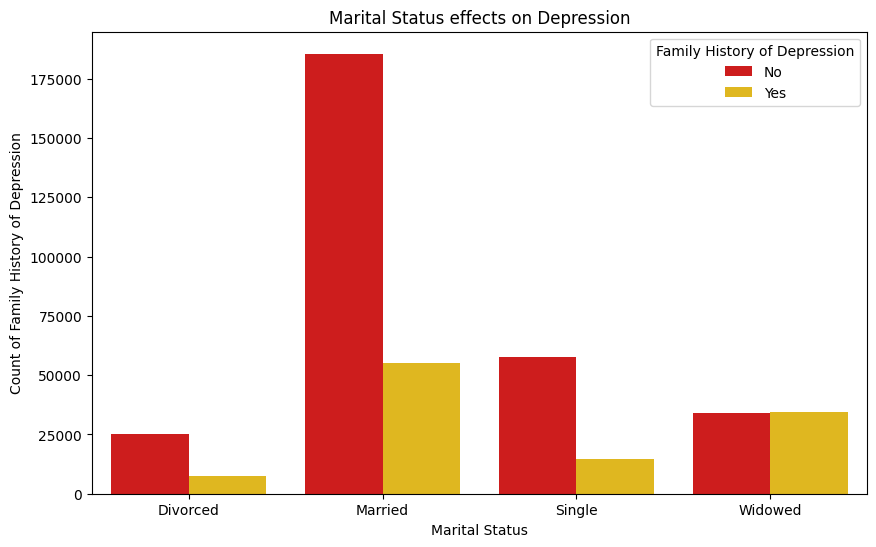

In [11]:
marital_dep = df.groupby(['Marital Status','Family History of Depression'])['Family History of Depression'].value_counts().reset_index(name='Count of Family History of Depression')
plt.figure(figsize=(10,6))
sns.barplot(data=marital_dep,x='Marital Status',y='Count of Family History of Depression',hue='Family History of Depression',palette='hot')
plt.title("Marital Status effects on Depression")

**Education Level effects on Depression**

Text(0.5, 1.0, 'Education Status effects on Depression')

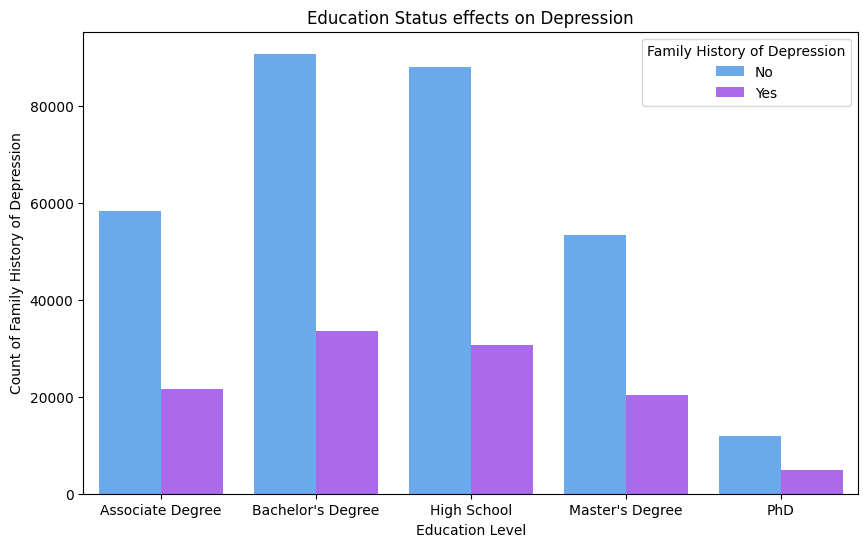

In [12]:
education_dep = df.groupby(['Education Level','Family History of Depression'])['Family History of Depression'].value_counts().reset_index(name='Count of Family History of Depression')
plt.figure(figsize=(10,6))
sns.barplot(data=education_dep,x='Education Level',y='Count of Family History of Depression',hue='Family History of Depression',palette='cool')
plt.title("Education Status effects on Depression")

In [13]:
education_dep

,Education Level,Family History of Depression,Count of Family History of Depression
0,Associate Degree,No,58328
1,Associate Degree,Yes,21671
2,Bachelor's Degree,No,90789
3,Bachelor's Degree,Yes,33540
4,High School,No,88152
5,High School,Yes,30775
6,Master's Degree,No,53355
7,Master's Degree,Yes,20413
8,PhD,No,11891
9,PhD,Yes,4854


Text(0.5, 1.0, 'Education Status effects on Depression')

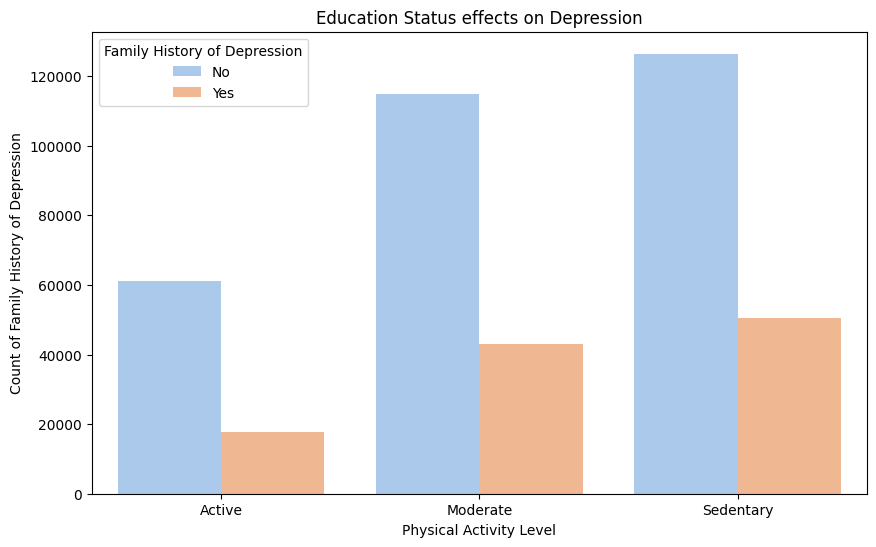

In [14]:
activity_dep = df.groupby(['Physical Activity Level','Family History of Depression'])['Family History of Depression'].value_counts().reset_index(name='Count of Family History of Depression')
plt.figure(figsize=(10,6))
sns.barplot(data=activity_dep,x='Physical Activity Level',y='Count of Family History of Depression',hue='Family History of Depression',palette='pastel')
plt.title("Education Status effects on Depression")

****

# **SMOKERS DATA**

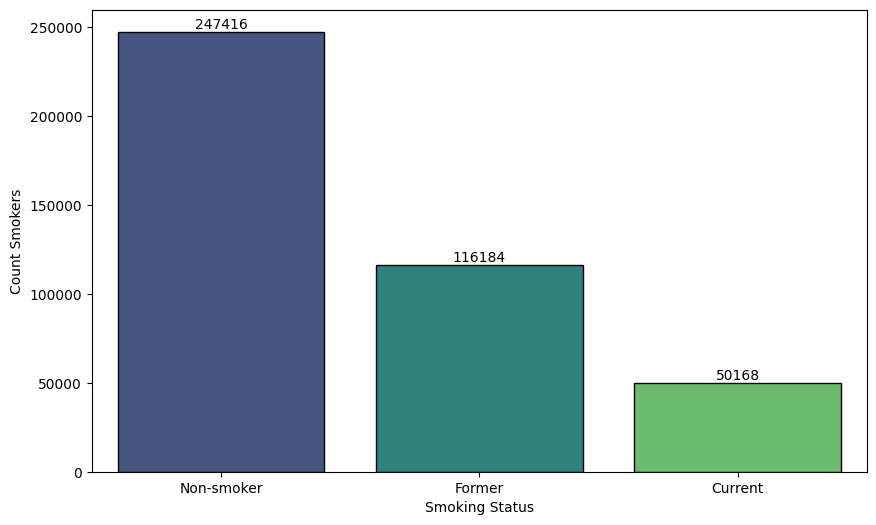

In [15]:
smokers_value = df['Smoking Status'].value_counts().reset_index(name='Count Smokers')
plt.figure(figsize=(10,6))
ax = (
    sns.barplot(data=smokers_value, 
                 x='Smoking Status',
                 y='Count Smokers',
                 palette='viridis',
                 edgecolor='black')
)

for container in ax.containers:
     ax.bar_label(container, fmt="%.0f", label_type='edge')

plt.show()

In [16]:
smokers_value

,Smoking Status,Count Smokers
0,Non-smoker,247416
1,Former,116184
2,Current,50168


**Smokers by Edu**

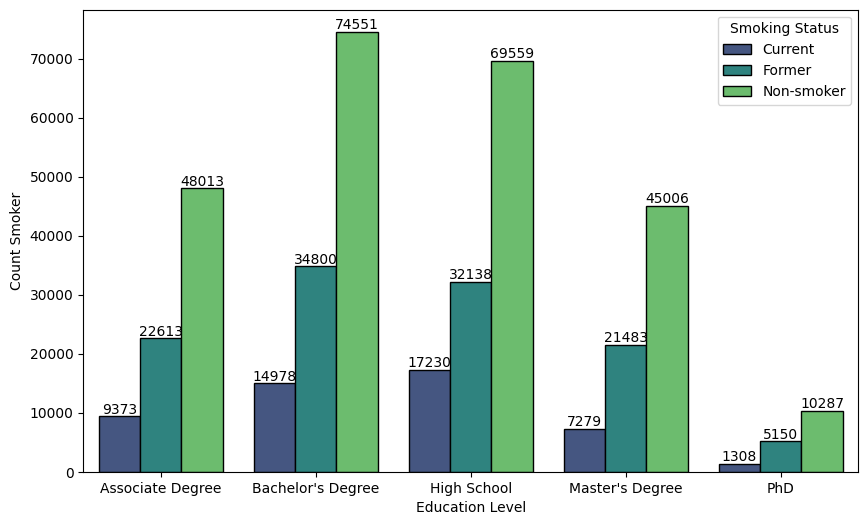

In [17]:
smoker_by_edu = df.groupby(['Education Level','Smoking Status'])['Smoking Status'].value_counts().reset_index(name='Count Smoker')
plt.figure(figsize=(10,6))
ax = (
    sns.barplot(
        data=smoker_by_edu,
        x='Education Level',
        y='Count Smoker', 
        hue='Smoking Status',
        palette='viridis',
        edgecolor='black')   
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge') 
    
plt.show()

In [18]:
smoking_mental = df.groupby(['Smoking Status','History of Mental Illness'])['History of Mental Illness'].value_counts().reset_index(name='Count of Mental Illness')
smoking_mental

,Smoking Status,History of Mental Illness,Count of Mental Illness
0,Current,No,35174
1,Current,Yes,14994
2,Former,No,81031
3,Former,Yes,35153
4,Non-smoker,No,171738
5,Non-smoker,Yes,75678


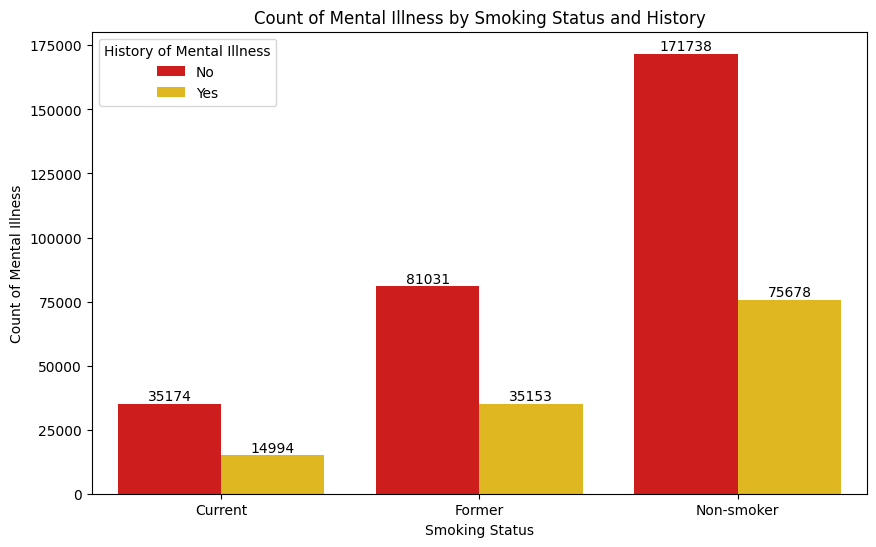

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=smoking_mental,
    x='Smoking Status',
    y='Count of Mental Illness',
    hue='History of Mental Illness',
    palette='hot'
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge') 

plt.title('Count of Mental Illness by Smoking Status and History')
plt.show()


In [20]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [21]:
children_by_depression = df.groupby(['Number of Children','Fa'])

KeyError: 'Fa'